# Attach GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt

# Read all datasets from working dir

In [ ]:
import os
import pandas as pd

# Set the directory path where your CSV files are located
directory_path = '/content/drive/MyDrive/Datasets/Acea Smart Water Analytics'

# Create an empty dictionary to store the dataframes
dfs = {}

# Loop through all CSV files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)
        
        # Read the CSV file into a dataframe and add it to the dictionary
        df_name = os.path.splitext(filename)[0]
        dfs[df_name] = pd.read_csv(file_path)

# dfs

# Generate profiling report for each dataset

In [ ]:
# !pip install pandas-profiling
from ydata_profiling import ProfileReport

In [ ]:
aq_do = dfs["Aquifer_Doganella"]
aq_au = dfs["Aquifer_Auser"]
wa_sp_am = dfs["Water_Spring_Amiata"]
la_bi = dfs["Lake_Bilancino"]
wa_sp_ma_ca = dfs["Water_Spring_Madonna_di_Canneto"]
aq_lu = dfs["Aquifer_Luco"]
aq_pe = dfs["Aquifer_Petrignano"]
wa_sp_lu = dfs["Water_Spring_Lupa"]
ri_ar = dfs["River_Arno"]

In [ ]:
rep1 = ProfileReport(aq_do)
rep2 = ProfileReport(aq_au)
rep3 = ProfileReport(wa_sp_am)
rep4 = ProfileReport(la_bi)
rep5 = ProfileReport(wa_sp_ma_ca)
rep6 = ProfileReport(aq_lu)
rep7 = ProfileReport(aq_pe)
rep8 = ProfileReport(wa_sp_lu)
rep9 = ProfileReport(ri_ar)
# report2 = ProfileReport(Aquifer_Auser,'Aquifer_Auser')
# report3 = ProfileReport(Water_Spring_Amiata, 'Water_Spring_Amiata')
# report4 = ProfileReport(Lake_Bilancino,'Lake_Bilancio')
# report5 = ProfileReport(Water_Spring_Madonna_di_Canneto,'Water_Spring_Madonna_di_Canneto')
# report6 = ProfileReport(Aquifer_Luco,'Aquifer_Luco')
# report7 = ProfileReport(Aquifer_Petrignano,'Aquifer_Petrignano')
# report8 = ProfileReport(Water_Spring_Lupa,'Water_Spring_Lupa')
# report9 = ProfileReport(River_Arno,'River_Arno')

In [ ]:
import IPython.display

In [ ]:
# rep3

# Workarounds for TimeSeries dataset

#### Moving average

In [ ]:
# Moving average
def plot_moving_average(column, window):
    plt.figure(figsize=(17,8))
    
    plt.plot(column[window:], label = "Actual")
    
    rolling_mean = column.rolling(window=window).mean()
    plt.plot(rolling_mean,'r',label="Rolling Mean Trend")
    
    plt.grid(True)

#### Smoothening with moving average

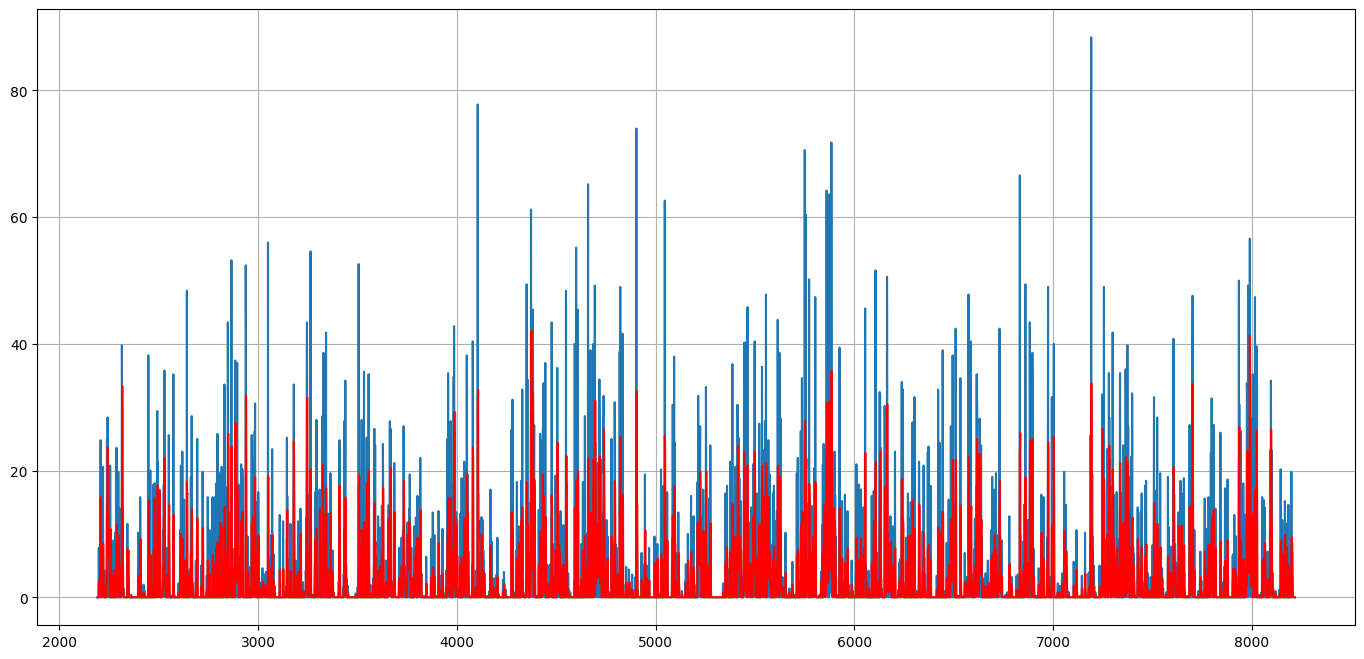

In [ ]:
plot_moving_average(ri_ar.Rainfall_Le_Croci,3)

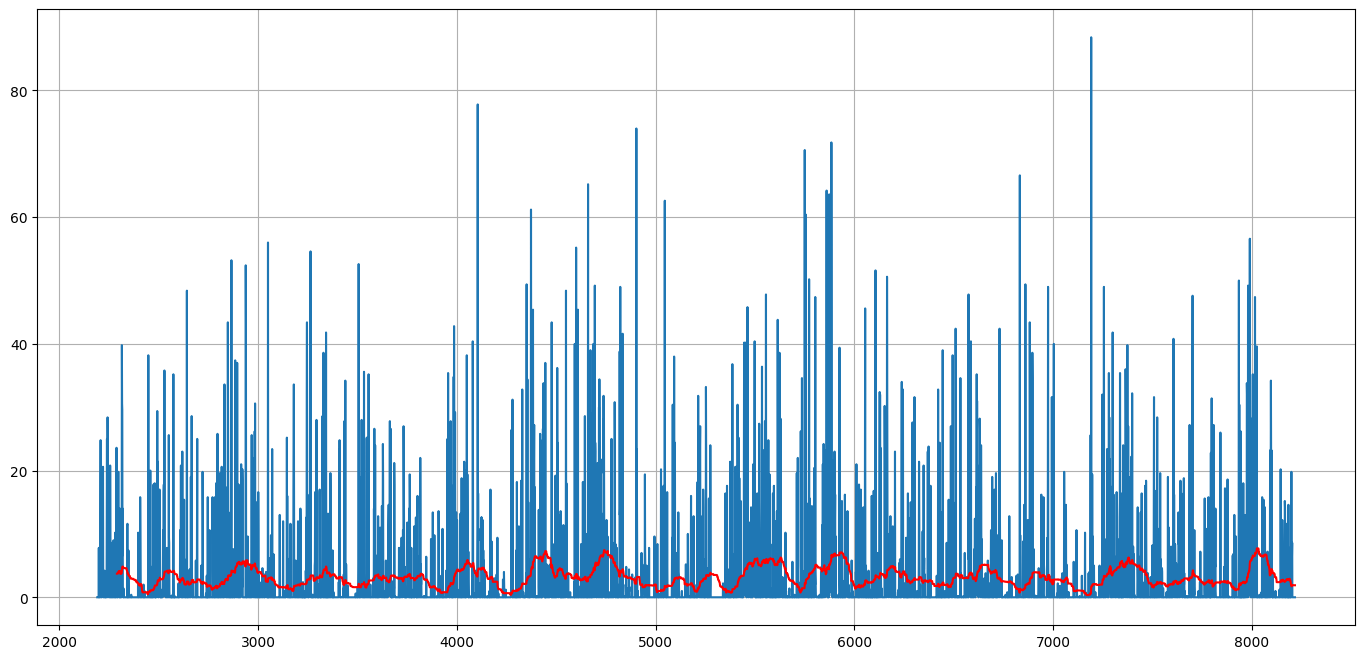

In [ ]:
plot_moving_average(ri_ar.Rainfall_Le_Croci,100)

#### Exponential smoothing

In [ ]:
def exponential_smoothing(column,alpha):
    result=[column[0]]
    
    for n in range(1, len(column)):
        old=alpha*column[n]+(1-alpha)*result[n-1]
        result.append(old)
        
    return result

In [ ]:
def exponential_smoothing_plot(column,alpha):
    plt.figure(figsize=(15,8))
    for a in alpha:
        plt.plot(exponential_smoothing(column,a), label=f"Alpha{a}")
        
    plt.plot(column.values,"c",label="Actual")
    plt.legend(loc="best")
    plt.grid(True)

In [ ]:
exponential_smoothing(ri_ar.Rainfall_Le_Croci,[0.005,0.02])

TypeError: ignored

In [ ]:
def tsplot(y, lags=None, figsize=(15,8), style='bmh'):

    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout=(2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title("Dicky-Fuller: p={0:.5f}".format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

MissingDataError: ignored

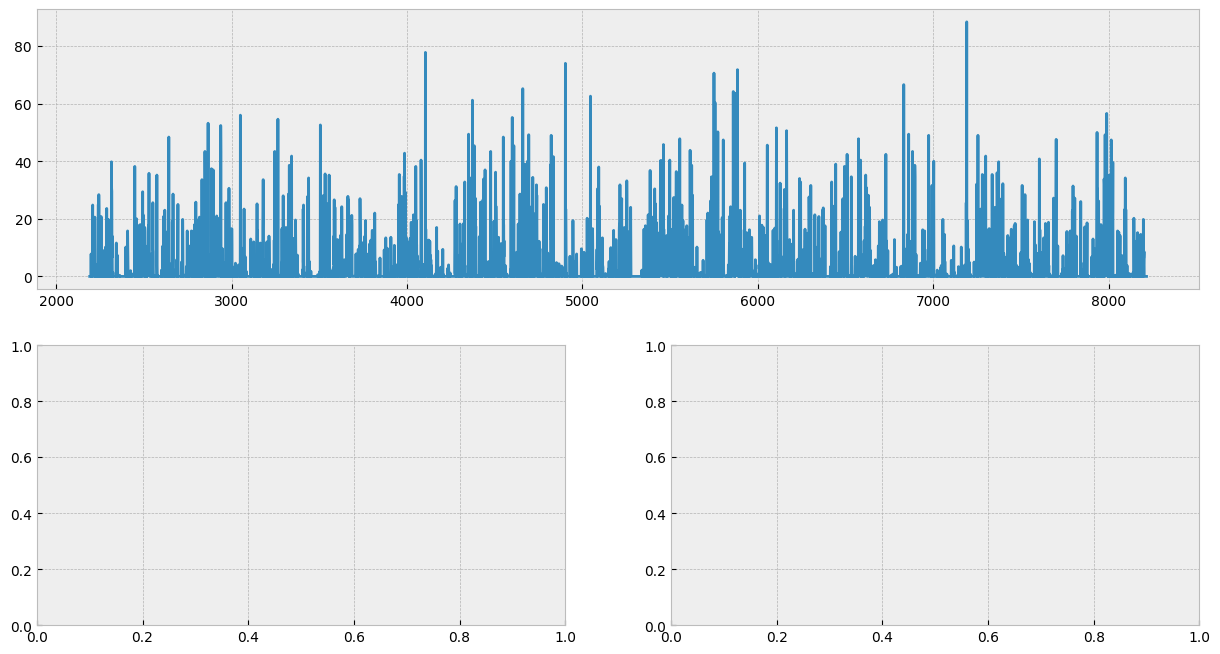

In [ ]:
tsplot(ri_ar.Rainfall_Le_Croci, lags=40)

# Cleaning

In [ ]:
# changing dataset

df = aq_do

In [ ]:
# Catagorical variables

cat_var = df.select_dtypes(include="object").columns
for cat_col in cat_var:
  df[cat_col] = df[cat_col].fillna(df[cat_col].mode()[0])

for cat_col in cat_var:
  print(cat_col, df[cat_col].isnull().sum())

Date 0


In [ ]:
# Numerical variables

num_var = df._get_numeric_data().columns
for num_col in num_var:
    df[num_col] = df[num_col].fillna(df[num_col].mean())

for num_col in num_var:
  print(num_col, df[num_col].isnull().sum())

Rainfall_Monteporzio 0
Rainfall_Velletri 0
Depth_to_Groundwater_Pozzo_1 0
Depth_to_Groundwater_Pozzo_2 0
Depth_to_Groundwater_Pozzo_3 0
Depth_to_Groundwater_Pozzo_4 0
Depth_to_Groundwater_Pozzo_5 0
Depth_to_Groundwater_Pozzo_6 0
Depth_to_Groundwater_Pozzo_7 0
Depth_to_Groundwater_Pozzo_8 0
Depth_to_Groundwater_Pozzo_9 0
Volume_Pozzo_1 0
Volume_Pozzo_2 0
Volume_Pozzo_3 0
Volume_Pozzo_4 0
Volume_Pozzo_5+6 0
Volume_Pozzo_7 0
Volume_Pozzo_8 0
Volume_Pozzo_9 0
Temperature_Monteporzio 0
Temperature_Velletri 0


In [ ]:
# Unique variables

# defining the function
def remove_distinct_value_features(df):
    return [e for e in df.columns if df[e].nunique() == df.shape[0]]

# calling the function
drop_col = remove_distinct_value_features(df)
drop_col

# updating the dataset
cols = [e for e in df.columns if e not in drop_col]
df = df[cols]
df

,Rainfall_Monteporzio,Rainfall_Velletri,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_2,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Depth_to_Groundwater_Pozzo_5,Depth_to_Groundwater_Pozzo_6,Depth_to_Groundwater_Pozzo_7,Depth_to_Groundwater_Pozzo_8,...,Volume_Pozzo_1,Volume_Pozzo_2,Volume_Pozzo_3,Volume_Pozzo_4,Volume_Pozzo_5+6,Volume_Pozzo_7,Volume_Pozzo_8,Volume_Pozzo_9,Temperature_Monteporzio,Temperature_Velletri
0,0.0,0.0,-36.929137,-94.746188,-111.638928,-98.223934,-102.552596,-91.672955,-95.819225,-95.84537,...,1529.376211,3433.485746,3208.114931,3527.627374,7178.560713,2491.400685,3660.482101,3239.807765,5.30,8.60
1,0.2,0.8,-36.929137,-94.746188,-111.638928,-98.223934,-102.552596,-91.672955,-95.819225,-95.84537,...,1529.376211,3433.485746,3208.114931,3527.627374,7178.560713,2491.400685,3660.482101,3239.807765,4.70,6.25
2,0.0,0.0,-36.929137,-94.746188,-111.638928,-98.223934,-102.552596,-91.672955,-95.819225,-95.84537,...,1529.376211,3433.485746,3208.114931,3527.627374,7178.560713,2491.400685,3660.482101,3239.807765,5.40,9.80
3,0.0,0.0,-36.929137,-94.746188,-111.638928,-98.223934,-102.552596,-91.672955,-95.819225,-95.84537,...,1529.376211,3433.485746,3208.114931,3527.627374,7178.560713,2491.400685,3660.482101,3239.807765,3.35,5.95
4,0.2,0.0,-36.929137,-94.746188,-111.638928,-98.223934,-102.552596,-91.672955,-95.819225,-95.84537,...,1529.376211,3433.485746,3208.114931,3527.627374,7178.560713,2491.400685,3660.482101,3239.807765,3.60,5.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6021,0.0,0.0,-50.320000,-100.350000,-100.880000,-101.490000,-104.310000,-97.940000,-96.590000,-97.74000,...,1516.104000,3883.932000,2526.516000,3867.876000,7949.304000,2684.412000,3911.832000,3450.132000,21.05,23.39
6022,0.0,0.0,-50.320000,-100.560000,-100.840000,-101.590000,-104.300000,-97.960000,-96.440000,-97.78000,...,1491.408000,3884.724000,2871.864000,3867.300000,7590.564000,2681.280000,3899.772000,3449.088000,22.18,24.44
6023,0.0,0.0,-50.320000,-100.560000,-100.920000,-101.590000,-104.300000,-98.460000,-96.440000,-97.78000,...,1485.756000,3885.228000,2858.400000,3869.352000,7944.660000,2962.980000,3901.032000,3449.808000,23.06,25.43
6024,0.0,0.0,-50.320000,-100.560000,-101.190000,-101.590000,-104.300000,-98.460000,-96.100000,-97.78000,...,1479.636000,3888.684000,2499.444000,3873.096000,7947.684000,2653.884000,3904.776000,3129.336000,22.03,24.22


<Axes: >

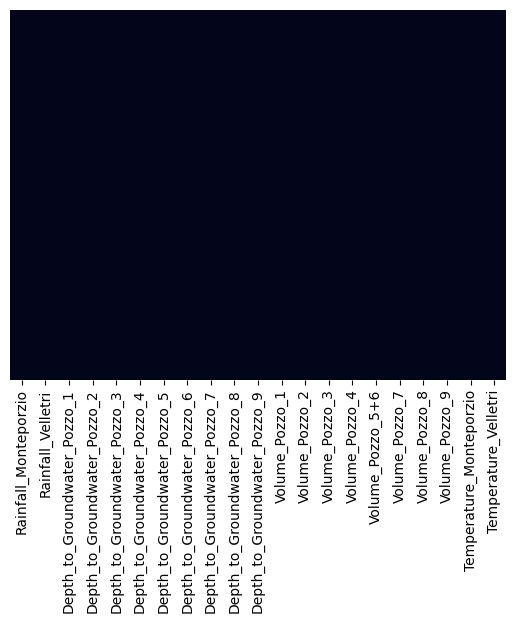

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
df.isnull().mean() * 100

Rainfall_Monteporzio            0.0
Rainfall_Velletri               0.0
Depth_to_Groundwater_Pozzo_1    0.0
Depth_to_Groundwater_Pozzo_2    0.0
Depth_to_Groundwater_Pozzo_3    0.0
Depth_to_Groundwater_Pozzo_4    0.0
Depth_to_Groundwater_Pozzo_5    0.0
Depth_to_Groundwater_Pozzo_6    0.0
Depth_to_Groundwater_Pozzo_7    0.0
Depth_to_Groundwater_Pozzo_8    0.0
Depth_to_Groundwater_Pozzo_9    0.0
Volume_Pozzo_1                  0.0
Volume_Pozzo_2                  0.0
Volume_Pozzo_3                  0.0
Volume_Pozzo_4                  0.0
Volume_Pozzo_5+6                0.0
Volume_Pozzo_7                  0.0
Volume_Pozzo_8                  0.0
Volume_Pozzo_9                  0.0
Temperature_Monteporzio         0.0
Temperature_Velletri            0.0
dtype: float64

In [ ]:
from google.colab import files
df.to_csv('aq_do_cleaned.csv')
files.download('aq_do_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>